# Getij West Terschelling 2020

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [283]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)


In [262]:
filename = '../datasets/20250208_012.csv'

In [272]:
import chardet

with open(filename, 'rb') as file:
    file.seek(235440)
    print(chardet.detect(file.read(1024)))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [ ]:
from chardet.universaldetector import UniversalDetector

detector = UniversalDetector()

with open(filename, 'rb') as file:
    while block := file.read(1024):
        detector.feed(block)
        if detector.done: 
            break
detector.close()

print(detector.result)

In [284]:
df = pd.read_csv(filename, sep=';', encoding='cp1252', engine='python')
df

,MONSTER_IDENTIFICATIE,MEETPUNT_IDENTIFICATIE,LOCATIE_CODE,TYPERING_OMSCHRIJVING,TYPERING_CODE,GROOTHEID_OMSCHRIJVING,GROOTHEID_ CODE,PARAMETER_OMSCHRIJVING,PARAMETER_ CODE,CAS_NR,EENHEID_CODE,HOEDANIGHEID_OMSCHRIJVING,HOEDANIGHEID_CODE,COMPARTIMENT_OMSCHRIJVING,COMPARTIMENT_CODE,WAARDEBEWERKINGSMETHODE_OMSCHRIJVING,WAARDEBEWERKINGSMETHODE_CODE,WAARDEBEPALINGSMETHODE_OMSCHRIJVING,WAARDEBEPALINGSMETHODE_CODE,BEMONSTERINGSSOORT_OMSCHRIJVING,BEMONSTERINGSSOORT_CODE,WAARNEMINGDATUM,WAARNEMINGTIJD (MET/CET),LIMIETSYMBOOL,NUMERIEKEWAARDE,ALFANUMERIEKEWAARDE,KWALITEITSOORDEEL_CODE,REFERENTIE,NOTITIE_CODE,NOTITIE_OMSCHRIJVING,STATUSWAARDE,OPDRACHTGEVENDE_INSTANTIE,MEETAPPARAAT_OMSCHRIJVING,MEETAPPARAAT_CODE,BEMONSTERINGSAPPARAAT_OMSCHRIJVING,BEMONSTERINGSAPPARAAT_CODE,PLAATSBEPALINGSAPPARAAT_OMSCHRIJVING,PLAATSBEPALINGSAPPARAAT_CODE,BEMONSTERINGSHOOGTE,REFERENTIEVLAK,EPSG,X,Y,ORGAAN_OMSCHRIJVING,ORGAAN_CODE,TAXON_NAME,GROEPERING_OMSCHRIJVING,GROEPERING_CODE,GROEPERING_KANAAL,GROEPERING_TYPE
0,NaN,West-Terschelling,WESTTSLG,NaN,NaN,Waterhoogte berekend,WATHTBRKD,NaN,NaN,NaN,cm,t.o.v. Normaal Amsterdams Peil,NAP,Oppervlaktewater,OW,NaN,NaN,Waterhoogte astronomisch mbv culminatie analyse,other:F008,NaN,NaN,01-01-2000,04:36:00,NaN,86,86.0,Normale waarde,NaN,NaN,NaN,Ongecontroleerd,RIKZMON_WAT,NaN,NaN,NaN,NaN,NaN,NaN,-999999999,NVT,25831,"647723,414001695","5914954,52555926",NaN,NaN,NaN,Getijextreem berekend,GETETBRKD2,2.0,MUX
1,NaN,West-Terschelling,WESTTSLG,NaN,NaN,Waterhoogte berekend,WATHTBRKD,NaN,NaN,NaN,cm,t.o.v. Normaal Amsterdams Peil,NAP,Oppervlaktewater,OW,NaN,NaN,Waterhoogte astronomisch mbv culminatie analyse,other:F008,NaN,NaN,01-01-2000,10:51:00,NaN,-79,-79.0,Normale waarde,NaN,NaN,NaN,Ongecontroleerd,RIKZMON_WAT,NaN,NaN,NaN,NaN,NaN,NaN,-999999999,NVT,25831,"647723,414001695","5914954,52555926",NaN,NaN,NaN,Getijextreem berekend,GETETBRKD2,2.0,MUX
2,NaN,West-Terschelling,WESTTSLG,NaN,NaN,Waterhoogte berekend,WATHTBRKD,NaN,NaN,NaN,cm,t.o.v. Normaal Amsterdams Peil,NAP,Oppervlaktewater,OW,NaN,NaN,Waterhoogte astronomisch mbv culminatie analyse,other:F008,NaN,NaN,01-01-2000,16:54:00,NaN,59,59.0,Normale waarde,NaN,NaN,NaN,Ongecontroleerd,RIKZMON_WAT,NaN,NaN,NaN,NaN,NaN,NaN,-999999999,NVT,25831,"647723,414001695","5914954,52555926",NaN,NaN,NaN,Getijextreem berekend,GETETBRKD2,2.0,MUX
3,NaN,West-Terschelling,WESTTSLG,NaN,NaN,Waterhoogte berekend,WATHTBRKD,NaN,NaN,NaN,cm,t.o.v. Normaal Amsterdams Peil,NAP,Oppervlaktewater,OW,NaN,NaN,Waterhoogte astronomisch mbv culminatie analyse,other:F008,NaN,NaN,01-01-2000,23:10:00,NaN,-77,-77.0,Normale waarde,NaN,NaN,NaN,Ongecontroleerd,RIKZMON_WAT,NaN,NaN,NaN,NaN,NaN,NaN,-999999999,NVT,25831,"647723,414001695","5914954,52555926",NaN,NaN,NaN,Getijextreem berekend,GETETBRKD2,2.0,MUX
4,NaN,West-Terschelling,WESTTSLG,NaN,NaN,Waterhoogte berekend,WATHTBRKD,NaN,NaN,NaN,cm,t.o.v. Normaal Amsterdams Peil,NAP,Oppervlaktewater,OW,NaN,NaN,Waterhoogte astronomisch mbv culminatie analyse,other:F008,NaN,NaN,02-01-2000,05:46:00,NaN,83,83.0,Normale waarde,NaN,NaN,NaN,Ongecontroleerd,RIKZMON_WAT,NaN,NaN,NaN,NaN,NaN,NaN,-999999999,NVT,25831,"647723,414001695","5914954,52555926",NaN,NaN,NaN,Getijextreem berekend,GETETBRKD2,2.0,MUX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741282,NaN,West-Terschelling,WTER,NaN,NaN,Waterhoogte,WATHTE,NaN,NaN,NaN,cm,t.o.v. Normaal Amsterdams Peil,NAP,Oppervlaktewater,OW,NaN,NaN,Rekenkundig gemiddelde waarde over vorige 5 en...,other:F007,Steekbemonstering,SB,08-02-2025,21:40:00,NaN,-53,NaN,Normale waarde,NaN,NaN,NaN,Ongecontroleerd,LMW_WATERSTANDEN,Vlotter,127.0,NaN,NaN,NaN,NaN,-999999999,NAP,25831,"647684,020116895","5914923,77870158",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2741283,NaN,West-Terschelling,WTER,NaN,NaN,Waterhoogte,WATHTE,NaN,NaN,NaN,cm,t.o.v. Normaal Amsterdams Peil,NAP,Oppervlaktewater,OW,NaN,NaN,Rekenkundig gemiddelde 

In [312]:
df = df[df['NUMERIEKEWAARDE'] != 999999999]

In [313]:
df.columns

Index(['MONSTER_IDENTIFICATIE', 'MEETPUNT_IDENTIFICATIE', 'LOCATIE_CODE', 'TYPERING_OMSCHRIJVING', 'TYPERING_CODE', 'GROOTHEID_OMSCHRIJVING', 'GROOTHEID_ CODE', 'PARAMETER_OMSCHRIJVING', 'PARAMETER_ CODE', 'CAS_NR', 'EENHEID_CODE', 'HOEDANIGHEID_OMSCHRIJVING', 'HOEDANIGHEID_CODE', 'COMPARTIMENT_OMSCHRIJVING', 'COMPARTIMENT_CODE', 'WAARDEBEWERKINGSMETHODE_OMSCHRIJVING', 'WAARDEBEWERKINGSMETHODE_CODE', 'WAARDEBEPALINGSMETHODE_OMSCHRIJVING', 'WAARDEBEPALINGSMETHODE_CODE', 'BEMONSTERINGSSOORT_OMSCHRIJVING', 'BEMONSTERINGSSOORT_CODE', 'WAARNEMINGDATUM', 'WAARNEMINGTIJD (MET/CET)', 'LIMIETSYMBOOL', 'NUMERIEKEWAARDE', 'ALFANUMERIEKEWAARDE', 'KWALITEITSOORDEEL_CODE', 'REFERENTIE', 'NOTITIE_CODE', 'NOTITIE_OMSCHRIJVING', 'STATUSWAARDE', 'OPDRACHTGEVENDE_INSTANTIE', 'MEETAPPARAAT_OMSCHRIJVING', 'MEETAPPARAAT_CODE', 'BEMONSTERINGSAPPARAAT_OMSCHRIJVING', 'BEMONSTERINGSAPPARAAT_CODE', 'PLAATSBEPALINGSAPPARAAT_OMSCHRIJVING', 'PLAATSBEPALINGSAPPARAAT_CODE', 'BEMONSTERINGSHOOGTE', 'REFERENTIEVLAK',
  

In [314]:
# file 20211004_006.csv
# date_column = 'WAARNEMINGDATUM'
# time_column = 'REFERENTIEWAARDE'
# value_column = 'NUMERIEKEWAARDE'

# file 20250208_012.csv
date_column = 'WAARNEMINGDATUM'
time_column = 'WAARNEMINGTIJD (MET/CET)'
value_column = 'NUMERIEKEWAARDE'

df[[date_column, time_column, value_column]]

,WAARNEMINGDATUM,WAARNEMINGTIJD (MET/CET),NUMERIEKEWAARDE
0,01-01-2000,04:36:00,86
1,01-01-2000,10:51:00,-79
2,01-01-2000,16:54:00,59
3,01-01-2000,23:10:00,-77
4,02-01-2000,05:46:00,83
...,...,...,...
2741282,08-02-2025,21:40:00,-53
2741283,08-02-2025,21:50:00,-58
2741284,08-02-2025,22:00:00,-64
2741285,08-02-2025,22:10:00,-69


In [315]:
df[[date_column, time_column, value_column]].describe()

,NUMERIEKEWAARDE
count,2.741115e+06
mean,1.022724e+00
std,6.487658e+01
min,-2.370000e+02
25%,-5.300000e+01
50%,6.000000e+00
75%,5.400000e+01
max,3.130000e+02


In [320]:
year_start = 2019
year_end = 2024

start = f'{year_start}-01-01 00:00:00'
end = f'{year_end}-12-31 23:59:59'

dt = pd.to_datetime(df[date_column], dayfirst=True) + pd.to_timedelta(df[time_column])

df_period = df[(dt >= start) & (dt <= end)]

df_waterhoogten = pd.DataFrame({
    'DT': pd.to_datetime(df_period[date_column], dayfirst=True) + pd.to_timedelta(df_period[time_column]),
    'WATERHOOGTE': df_period[value_column]
}).set_index('DT').sort_index()

df_waterhoogten

,WATERHOOGTE
DT,
2019-01-01 00:00:00,-40
2019-01-01 00:00:00,-35
2019-01-01 00:10:00,-25
2019-01-01 00:10:00,-32
2019-01-01 00:20:00,-24
...,...
2024-12-31 23:30:00,61
2024-12-31 23:40:00,56
2024-12-31 23:40:00,55


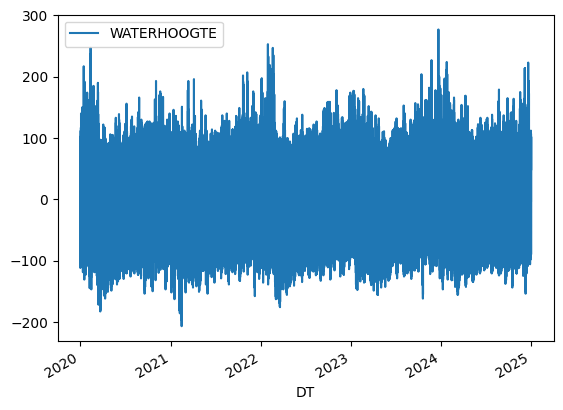

In [318]:
df_waterhoogten.sort_index().plot()
plt.show()

,WATERHOOGTE
DT,
2019-01-01 00:00:00,-37.5
2019-01-01 00:10:00,-28.5
2019-01-01 00:20:00,-21.0
2019-01-01 00:30:00,-13.0
2019-01-01 00:40:00,-6.5
...,...
2024-12-31 23:10:00,73.0
2024-12-31 23:20:00,67.0
2024-12-31 23:30:00,61.5


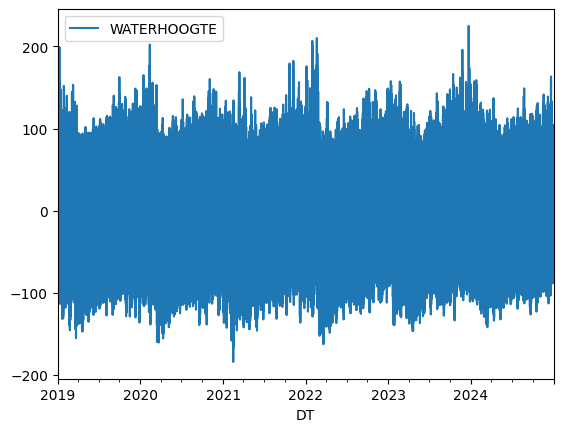

In [325]:
df_10min = df_waterhoogten.resample('10min').mean()
display(df_10min)

df_10min.plot()
plt.show()

,WATERHOOGTE
DT,
2019-01-01 00:00:00,-17.500000
2019-01-01 01:00:00,24.250000
2019-01-01 02:00:00,57.416667
2019-01-01 03:00:00,84.916667
2019-01-01 04:00:00,104.230769
...,...
2024-12-31 19:00:00,55.500000
2024-12-31 20:00:00,78.583333
2024-12-31 21:00:00,94.615385


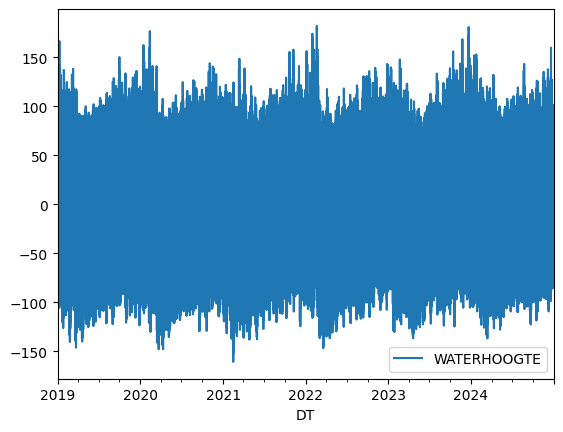

In [323]:
df_hourly = df_waterhoogten.resample('h').mean()
display(df_hourly)

df_hourly.plot()
plt.show()

### Spectrum and Periodogram

In [333]:
from scipy.signal import periodogram

frequencies, power_spectrum = periodogram(df_hourly['WATERHOOGTE'], return_onesided=True)

Peak at 0.08052007299270073 Hz - Period 12.419263456090652 with power 74389905.33750431 and prominence 74389905.33726881
Peak at 0.08333333333333333 Hz - Period 12.0 with power 11177755.47486389 and prominence 11177606.173606763


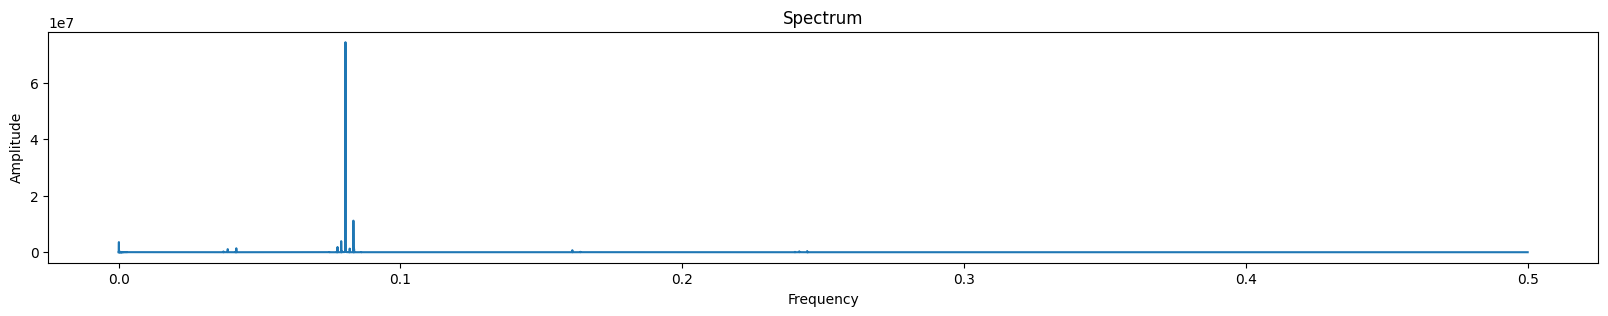

In [334]:
from scipy.signal import find_peaks

peaks, d = find_peaks(power_spectrum, prominence=6000000)

for i, peak in enumerate(peaks):
    period = 1/frequencies[peak]
    prominence = d['prominences'][i]
    print(f'Peak at {frequencies[peak]} Hz - Period {period} with power {power_spectrum[peak]} and prominence {prominence}')

fig, ax = plt.subplots(figsize=(20, 3))

ax.step(frequencies, power_spectrum)

ax.set_title('Spectrum')
ax.set_xscale('linear')
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')

plt.show()

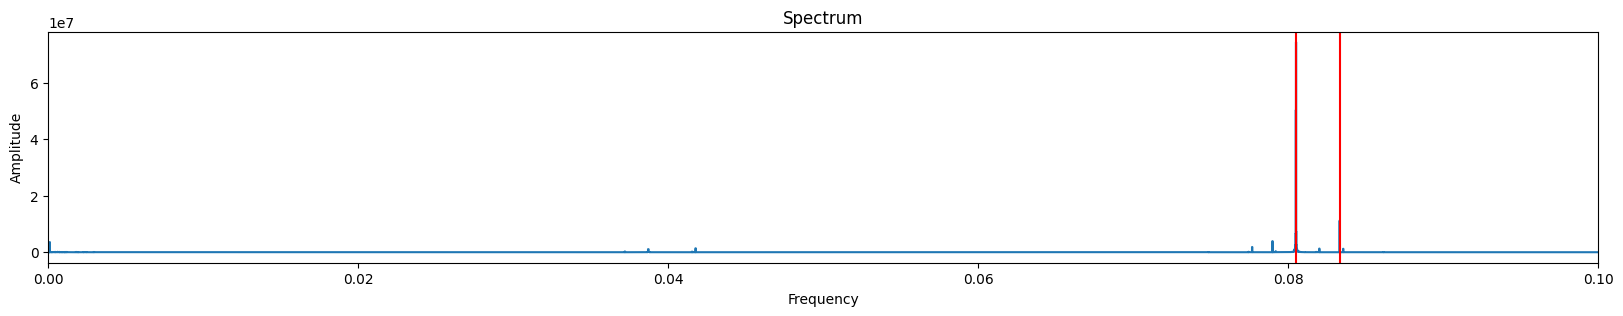

In [336]:
fig, ax = plt.subplots(figsize=(20, 3))

ax.step(frequencies, power_spectrum)

for peak in peaks:
    ax.axvline(frequencies[peak], color='red')

ax.set_title('Spectrum')
ax.set_xscale('linear')
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')

ax.set_xlim(0, 0.1)

plt.show()

Peak at 12.419263456090652h
Peak at 12.0h


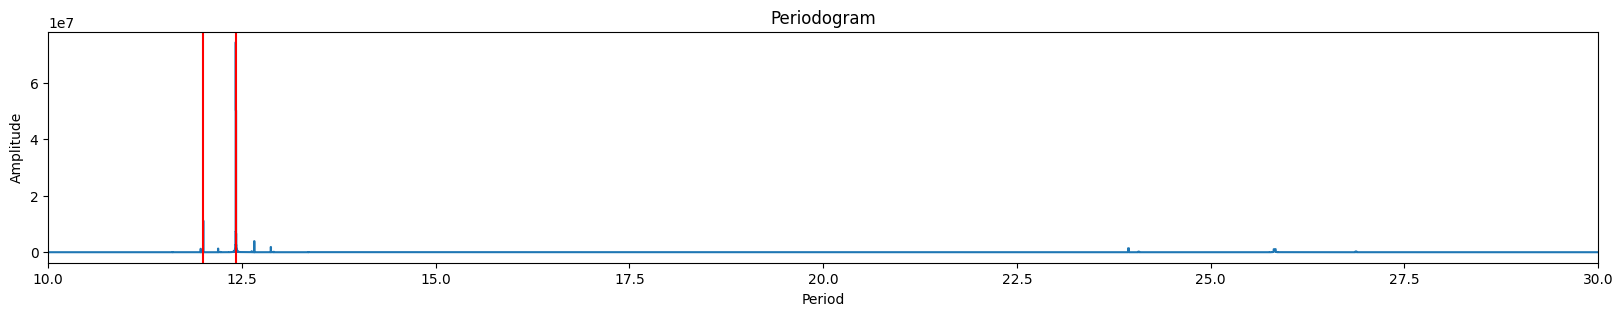

In [340]:
fig, ax = plt.subplots(figsize=(20, 3))

periods = np.divide(1, frequencies, out=np.full_like(frequencies, np.inf), where=frequencies!=0)
ax.step(periods, power_spectrum)

for peak in peaks:
    period = 1/frequencies[peak]
    ax.axvline(period, color='red')
    print(f'Peak at {period}h')

ax.set_title('Periodogram')
ax.set_xscale('linear')
ax.set_xlabel('Period')
ax.set_ylabel('Amplitude')

ax.set_xlim(10, 30)

plt.show()

Peak at 0.03920297126314027 Hz - Period 25.508270617748508 (25:30) with power 38982860.996460356 and prominence 38982860.99631511
Peak at 0.03872353699557599 Hz - Period 25.8240873015873 (25:49) with power 23837990.45119842 and prominence 23833906.321150374
Peak at 0.03870509721605429 Hz - Period 25.83639034460854 (25:50) with power 23151443.08569868 and prominence 11381878.36973935


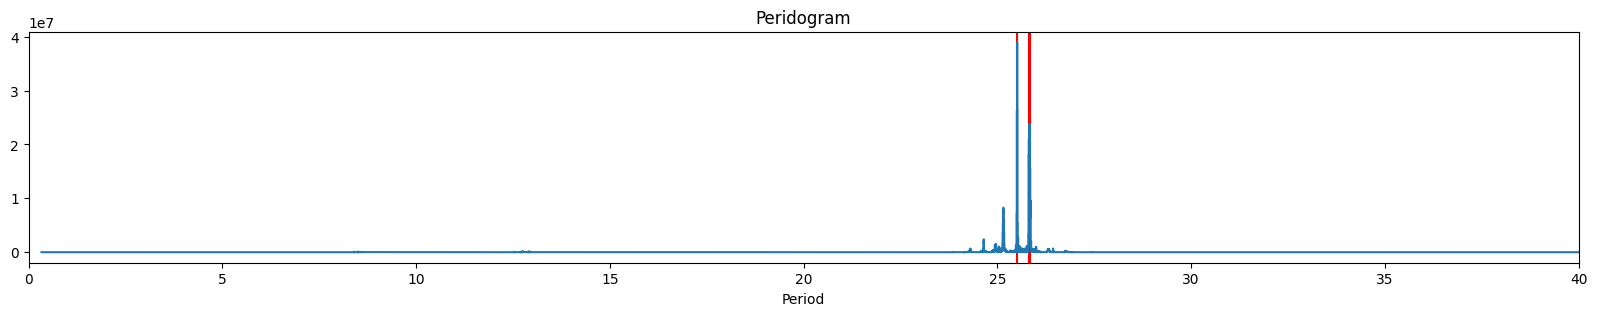

In [341]:
frequencies, power_spectrum = periodogram(df_waterhoogten['WATERHOOGTE'], fs=6, return_onesided=True)

peaks, d = find_peaks(power_spectrum, prominence=100000)

fig, ax = plt.subplots(figsize=(20, 3))

for peak, prominence in sorted(zip(peaks, d['prominences']), key=lambda t: t[1], reverse=True)[:3]:
    period = 1/frequencies[peak]
    ax.axvline(period, color='red')
    print(f'Peak at {frequencies[peak]} Hz - Period {period} ({format_hours(hours=period)}) with power {power_spectrum[peak]} and prominence {prominence}')

periods = np.divide(1, frequencies, out=np.full_like(frequencies, np.inf), where=frequencies!=0)

ax.step(periods, power_spectrum)

ax.set_title('Peridogram')
ax.set_xscale('linear')
ax.set_xlabel('Period')

ax.set_xlim(0, 40)

plt.show()


In [377]:
def format_hours(days = 0, hours = 0, minutes = 0, seconds = 0, unit = 'h', show_seconds = False):
    t = round(((((days * 24 + hours) * 60) + minutes) * 60) + seconds)
    
    full_seconds = t % 60
    full_minutes = (t // 60) % 60
    full_hours = (t // (60 * 60)) % 24
    full_days = (t // (24 * 60 * 60))

    full_days, remainder = divmod(t, 24 * 60 * 60)
    full_hours, remainder = divmod(remainder, 60 * 60)
    full_minutes, remainder = divmod(remainder, 60)
    full_seconds = remainder

    if unit == 'd':
        s = f'{full_days}d {full_hours:02}:{full_minutes:02}'
    elif  unit == 'h':
        s = f'{full_days * 24 + full_hours}:{full_minutes:02}'
    elif  unit == 'm':
        s = f'{(full_days * 24 + full_hours) * 60 + full_minutes}'
                 
    if show_seconds:
        s += f':{full_seconds:02}'

    return s


format_hours(hours = 12.406779661016948, unit='h')

'12:24'

# With scipy.fft.fft

In [344]:
from scipy.fft import fft, ifft

In [345]:
x = df_waterhoogten.index - df_waterhoogten.index.min()
y = df_waterhoogten['WATERHOOGTE'].values

x[:10], y[:10]

(TimedeltaIndex(['0 days 00:00:00', '0 days 00:00:00', '0 days 00:10:00', '0 days 00:10:00', '0 days 00:20:00', '0 days 00:20:00', '0 days 00:30:00', '0 days 00:30:00', '0 days 00:40:00', '0 days 00:40:00'], dtype='timedelta64[ns]', name='DT', freq=None),
 array([-40, -35, -25, -32, -24, -18, -15, -11,  -5,  -8]))

In [351]:
N = len(y)
sample_rate = 1/6     # every 10 minutes => 1/6 hour

yf = abs(fft(y))

freq = np.fft.fftfreq(N, sample_rate)

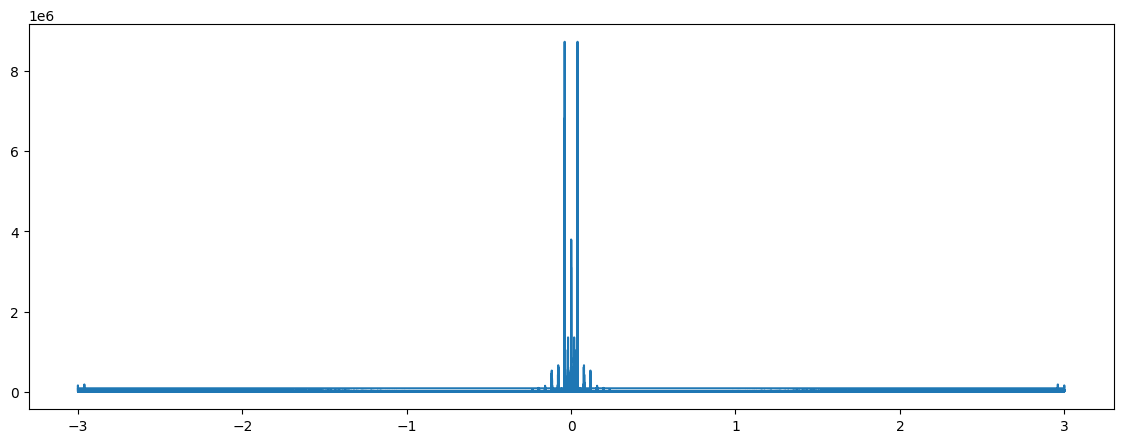

In [352]:
fig, ax = plt.subplots(1, 1, figsize = (14, 5))

ax.plot(freq, yf)

plt.show()

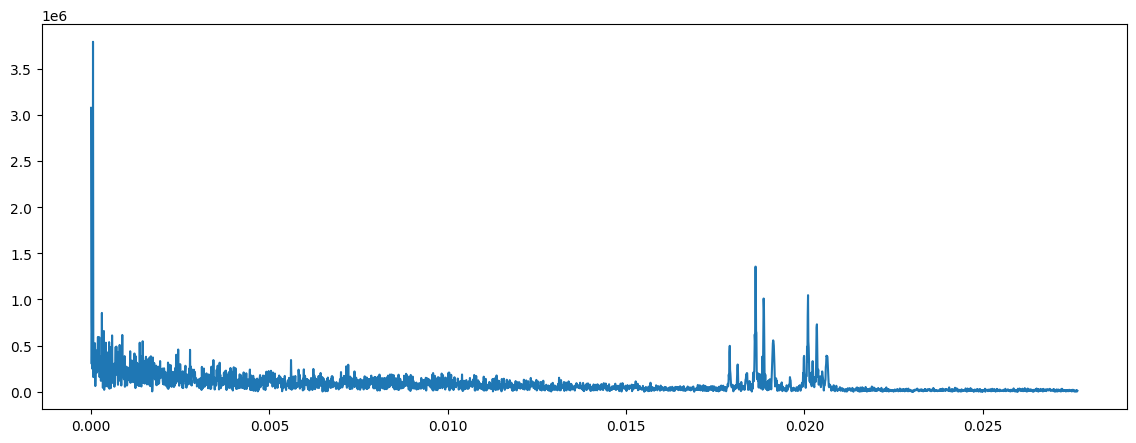

In [353]:
fig, ax = plt.subplots(figsize = (14, 5))

ax.plot(freq[:3000], yf[:3000])

plt.show()

In [361]:
def find_peak_period(yf, freq, around, margin = 0.02):
    index_range = (freq > around - margin) & (freq < around + margin)
    max_at = yf[index_range].argmax()
    period = 1/freq[index_range][max_at]
    return period

In [360]:
period = find_peak_period(yf, freq, 0.09)
print('Period', format_hours(hours = period), 'hours')

Period 12:45 hours


In [362]:
max_at = yf.argmax()
period = 1/freq[max_at]
print('Period', format_hours(hours = period), 'hours')

Period 25:30 hours


In [363]:
max_at = yf.argmax()
max_at

period = 1/freq[max_at]
period

print('Period', format_hours(hours = period), 'hours')

Period 25:30 hours


In [364]:
period = find_peak_period(yf, freq, 0.18)
print('Period', format_hours(hours = period), 'hours')

Period 5:03 hours


In [365]:
period = find_peak_period(yf, freq, 0.27)
print('Period', format_hours(hours = period), 'hours')

Period 3:38 hours


In [379]:
period = find_peak_period(yf, freq, 0.01, 0.009)

print(period)

print('Period', format_hours(hours = period), 'hours')

print('Period', format_hours(hours = period, unit='d'))


53.693646864686464
Period 53:41 hours
Period 2d 05:41
